In [43]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
iris = load_iris()

In [44]:
#Here we are using scikitlearn's dataset of Iris flower for the project

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [45]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [46]:
#creating our dataframe in pandas for the upcoming machine learning model building project

df = pd.DataFrame(iris.data,columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [47]:
#Adding two more columns to our current dataframe

df['target'] = iris.target
df['flower_names'] = df.target.apply(lambda x : iris.target_names[x])

In [62]:
#checking for the different flower names. (Observe carefully that we have versicolor flowers from 50th to 99th row and setosa from 0th to 49th)

df[df['target']==2].tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [49]:
#creating three separate dataframes from df dataframe(Note : Here each dataframe has a separate type of flower to help uus create the upcoming scatter plot)

df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

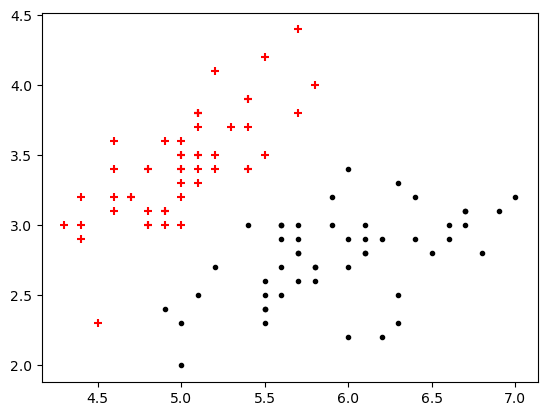

In [50]:
#plotting sepal length and sepal width of setosa and versicolor flowers
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color = 'red',marker = '+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color = 'black',marker = '.')

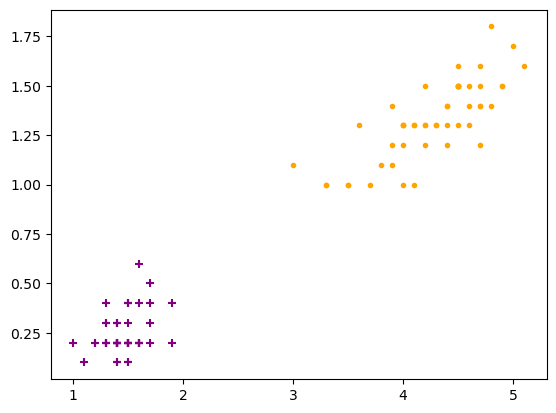

In [52]:
#plotting petal length and petal width of setosa and versicolor flowers

plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color = 'purple',marker = '+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = 'orange',marker = '.')

In [53]:
x = df.drop(columns = ['target','flower_names'])
y = df['target']

In [54]:
#It is clear for the above scatter plot that here our machine learning model will be support vector machine that will help us draw the line separating the different types of flowers 
#with a fair amount of accuracy

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [55]:
#len(x_test)
len(x_train)

105

In [56]:
#using support vector classifier from support vector machine
#mathematically a kernel is a third plane which substitutes the already present planes in the problem
#here we are using an RBF kernel.
#also we can try it using a linear 

from sklearn import svm
model = svm.SVC(kernel = 'rbf')

In [57]:
#training our model using 70% of the data(majority of the data  used for training and 20% or 30% can be used for testing)
model.fit(x_train,y_train)

SVC()

In [58]:
#our model here takes 30% of data and predicts the flower type(setosa = 0, versicolor = 1, virginica = 2)
model.predict(x_test)

array([1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2, 0, 0,
       2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 0, 1, 0, 1,
       1])

In [59]:
#Bingo! our model is 95% accurate
model.score(x_test,y_test)

0.9555555555555556